# 채택/기각샘플링(Acceptance/Rejection sampling)

### 예제1: Toy Exam

### 예제2: $Beta(2.7,6.3)$를 따르는 확률변수를 생성해보자. 

pdf는 아래와 같다.

$f(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$

In [1]:
f<-function(x){
    alpha=2.7
    beta=6.3
    gamma(alpha+beta)/gamma(alpha)/gamma(beta) * x^(alpha-1) * (1-x)^(beta-1)
}

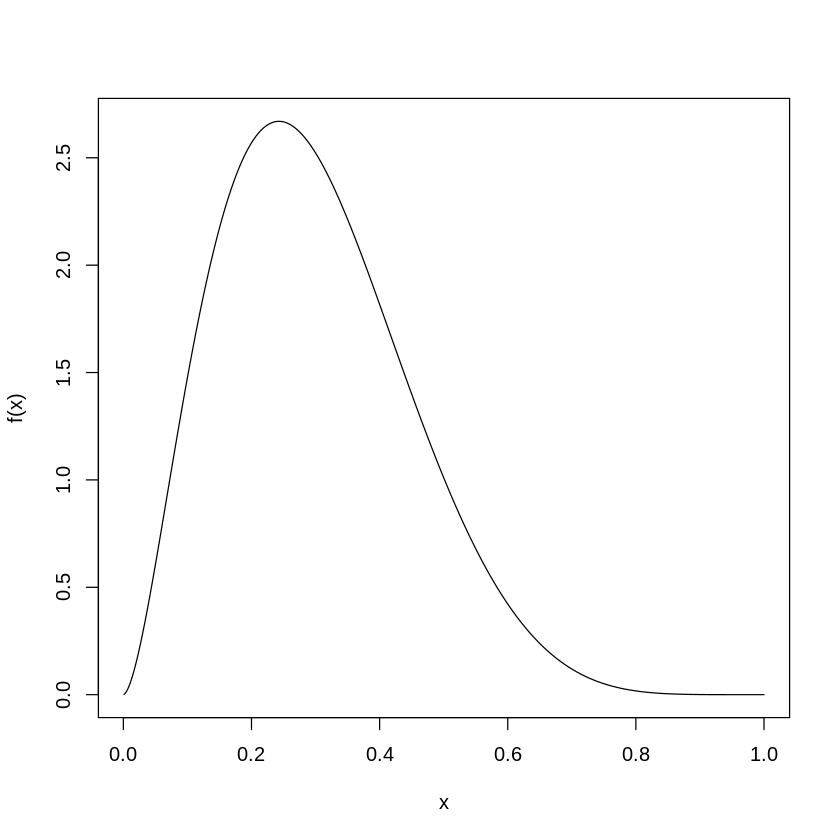

In [2]:
x<-1:1000/1000
plot(x,f(x),type='l')

(단계1) target density를 감싸는 사각형을 만든다. 

In [3]:
a=1 #사각형의 밑변
b=optimize(f=f,interval=c(0,1),maximum=T)$objective

(단계2) 사각형에서 임의로 점을 뿌린다. 즉 밑변이 1이고 높이고 2.67인 사각형에 임의로 점을 뿌린다. 

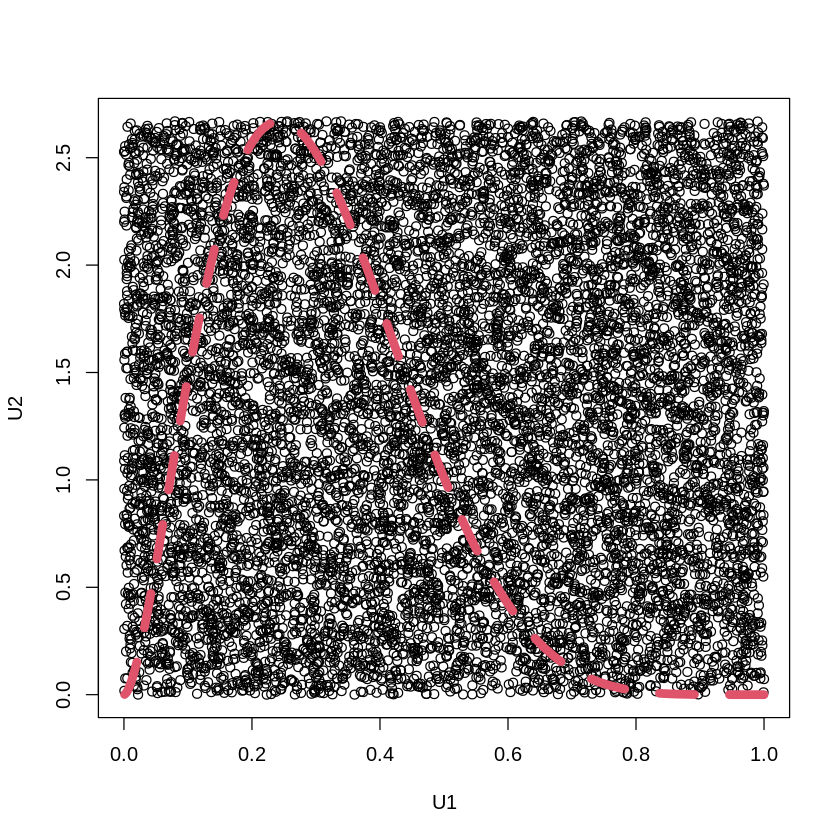

In [4]:
n<-10000
U1<-runif(n)*a
U2<-runif(n)*b
plot(U1,U2)
lines(x,f(x),col=2,lwd=7,lty=2)

(단계3) pdf곡선보다 아래에 있는 점들을 붉은색으로 표시한다. 

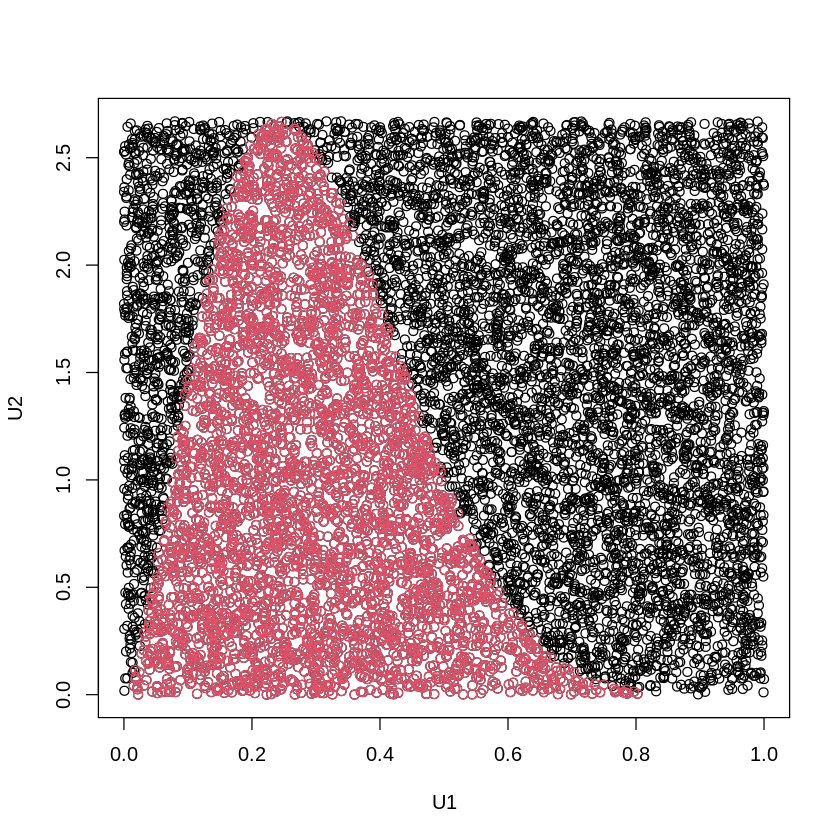

In [5]:
index_<- U2 < f(U1)
plot(U1,U2)
points(U1[index_],U2[index_],col=2)

(단계4) 붉은색의 점들에서 $y$축의 값은 버리고, $x$의 값만 취하면 된다. 

In [6]:
X<- U1[index_]

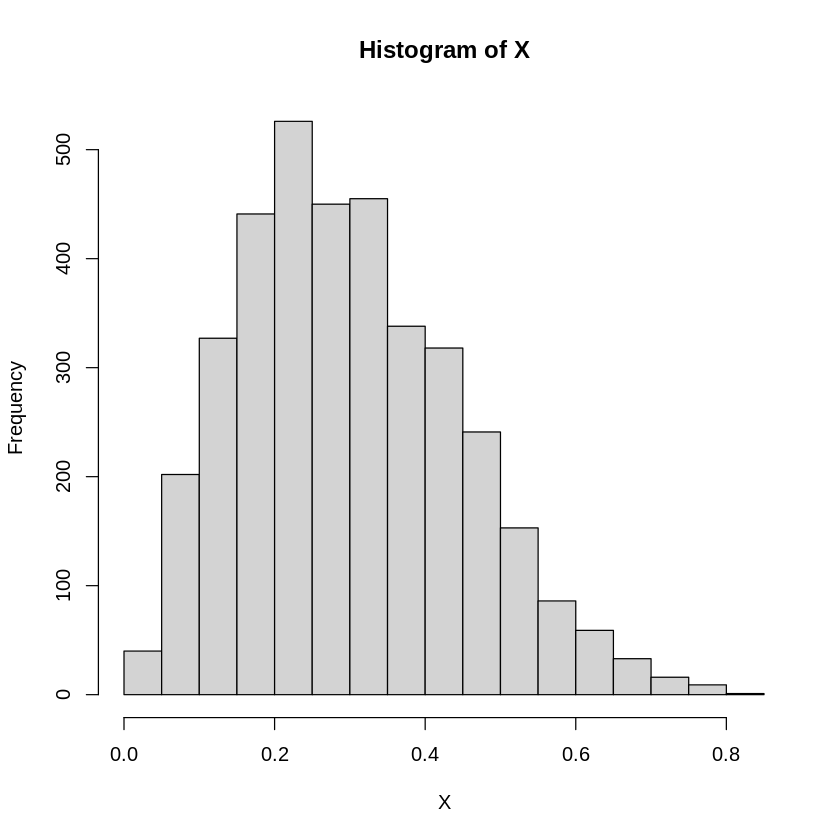

In [7]:
hist(X)

(확인)

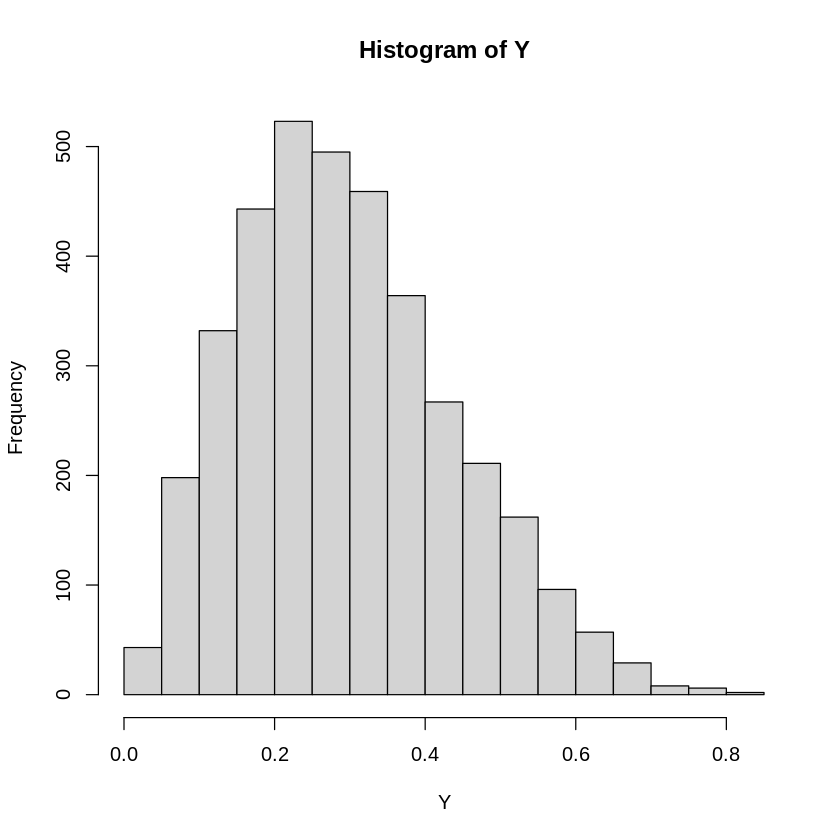

In [8]:
Y<-rbeta(length(X),shape1=2.7,shape2=6.3)
hist(Y)

잘 추출되었다.. 

...

### [$\ast$] 효율이..? 버려지는 점들이 너무 많은것 아닌가?  

In [10]:
mean(index_)

[1] 0.3695

전체 샘플리한것중에서 36.95%만 랜덤변수로 `채택`되고 나머지는 `기각`되었다. 

채택율: 36.95%

채택율을 높이려면 어떻게 해야하는가? 

꼭 `틀`이 사각형일 필요가 있을까? 

### 예제2: $Beta(2.7,6.3)$를 따르는 확률변수를 (좀 더 효율적으로) 생성해보자. 

우리가 생성하고 싶은 분포 $Beta(2.7,6.3)$의 pdf를 아래와 같이 두자. 

$f(x)=\frac{\Gamma(2.7+6.3)}{\Gamma(2.7)\Gamma(6.3)}x^{2.7-1}(1-x)^{6.3-1}$

이제 $Beta(2,6)$의 pdf를 생각하여 보자. (왠지 $Beta(2,6)$의 pdf모양은 $Beta(2.7,6.3)$의 pdf모양과 비슷할것 같다.)

$g(x)=\frac{\Gamma(2+6)}{\Gamma(2)\Gamma(6)}x^{2-1}(1-x)^{6-1}$

정말로 $g(x)$와 $f(x)$가 비슷한지 그려보자. 

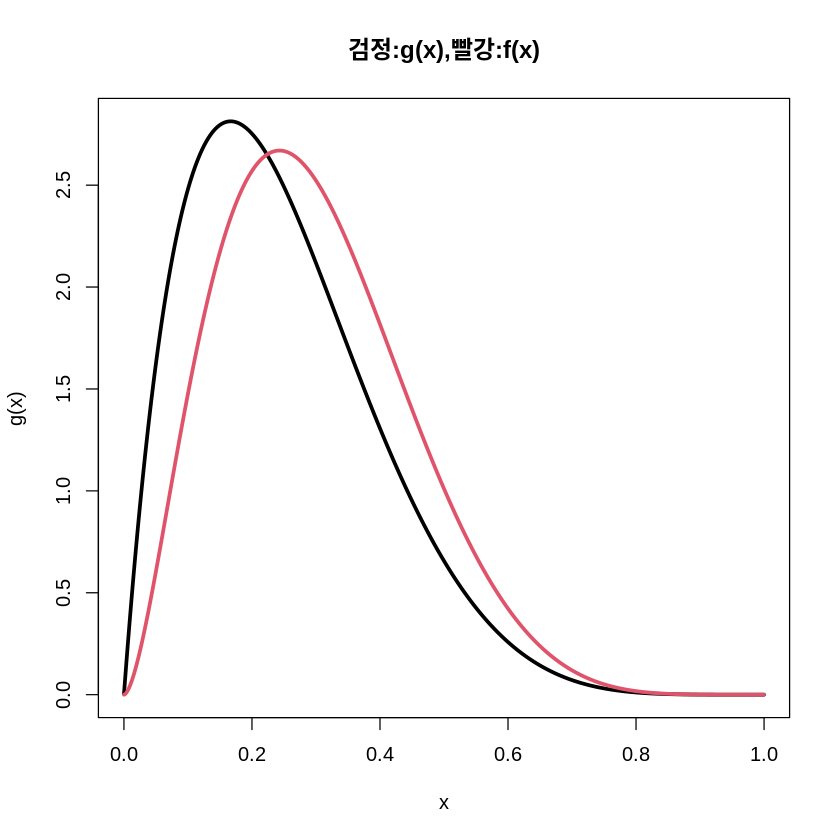

In [18]:
f<-function(x){
    alpha=2.7
    beta=6.3
    gamma(alpha+beta)/gamma(alpha)/gamma(beta) * x^(alpha-1) * (1-x)^(beta-1)
}

g<-function(x){
    alpha=2
    beta=6
    gamma(alpha+beta)/gamma(alpha)/gamma(beta) * x^(alpha-1) * (1-x)^(beta-1)
}
x<-1:9999/10000
plot(x,g(x),type='l',main="검정:g(x),빨강:f(x)",lwd=3)
lines(x,f(x),col=2,lwd=3)

$g(x)$의 값이 뒷 부분에 있는 값들이 좀더 커졌으면 ($f(x)$를 덮을만큼) 좋겠다. 

$g(x)$에 적당한 수 $M$을 곱하면 검은선이 붉은선을 덮을 수 있지 않나? 

예를들어서 $M=1.5$정도면 충분히 덮을것 같다. 

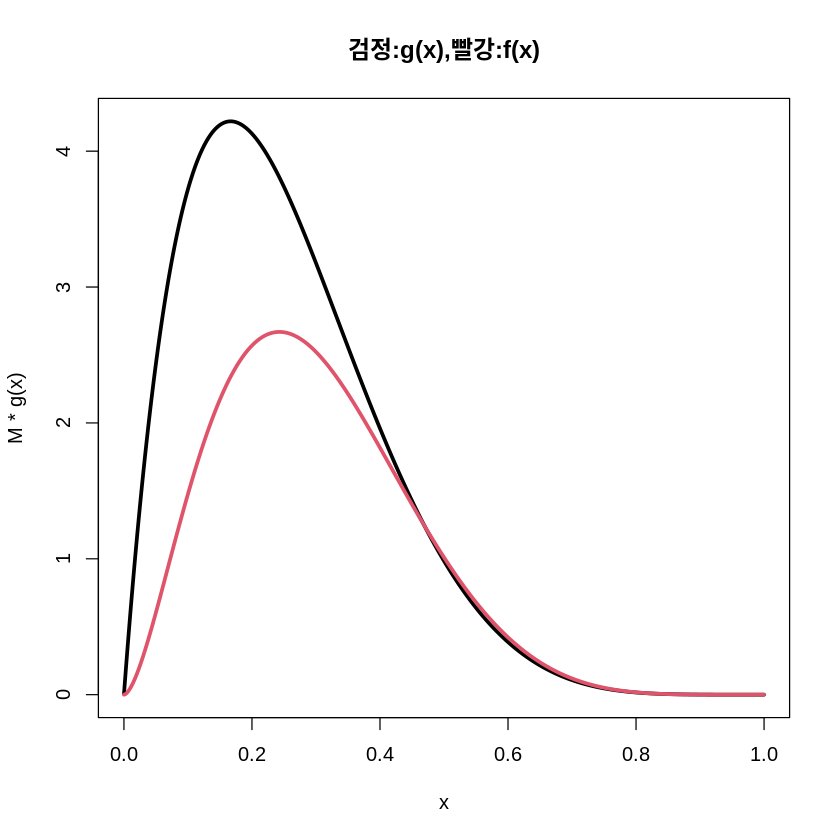

In [20]:
M=1.5
plot(x,M*g(x),type='l',main="검정:g(x),빨강:f(x)",lwd=3)
lines(x,f(x),col=2,lwd=3)

생각보다 안덮힌다.. $\to$ $M=2$ 투입.

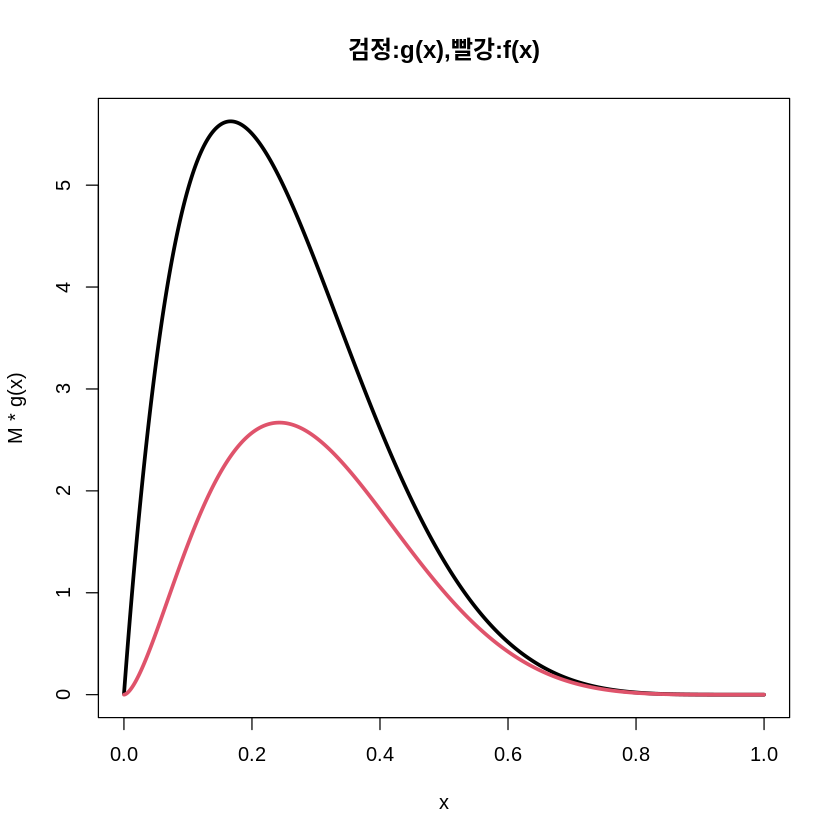

In [21]:
M=2
plot(x,M*g(x),type='l',main="검정:g(x),빨강:f(x)",lwd=3)
lines(x,f(x),col=2,lwd=3)

잘 덮어졌는지 확인을 해보자. 

In [24]:
min(M*g(x) / f(x))

[1] 1.19631

$M$값을 좀더 작게 잡을 수는 없을까? 

그러니까 $\min\big(\frac{Mg(x)}{f(x)}\big)=1$이면 좋겠다... $\to$ $M=\frac{1}{\min\big(\frac{g(x)}{f(x)}\big)}$

In [26]:
M<- 1 / min(g(x)/f(x))
M

[1] 1.671808

다시 그려보자.

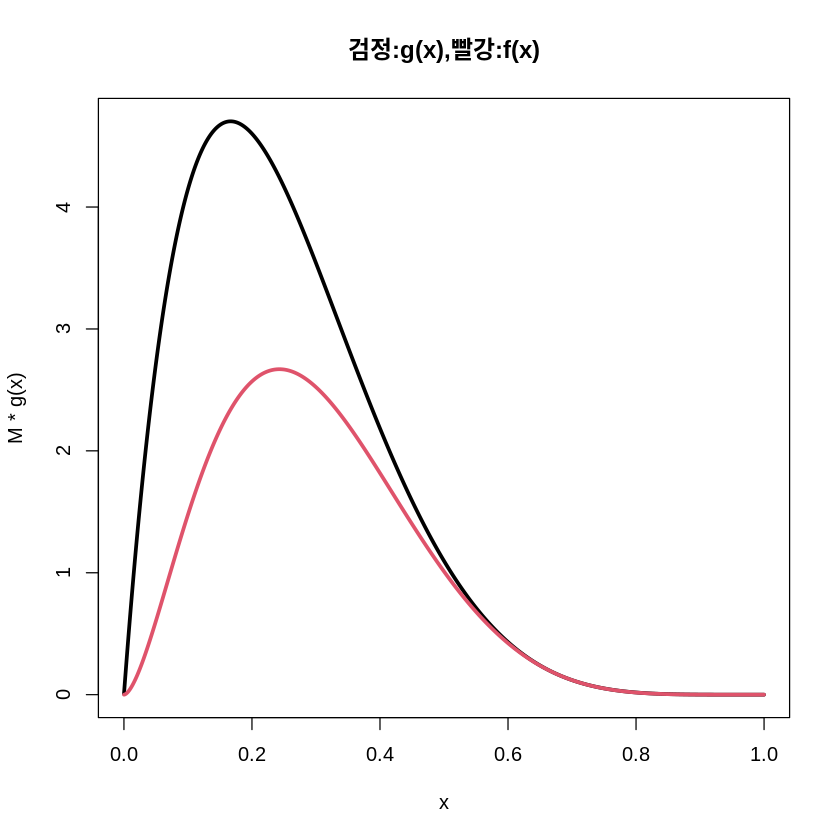

In [27]:
plot(x,M*g(x),type='l',main="검정:g(x),빨강:f(x)",lwd=3)
lines(x,f(x),col=2,lwd=3)

이제 아래와 같이 하면 될것 같다. 

(단계1) 검은선 아래에 랜덤으로 점을 뿌린다. 

(단계2) 빨간선 아래에 위치한 점들을 빨간색으로 표시한다. 

(단계3) 빨간점들의 $x$값들만 취한다. 

---

**[단계1]:** 검은선 아래에 랜덤으로 점을 뿌린다.  

-> 못하겠다.. 

--> 그런데 일단 검은선 아래에 랜덤으로 점이 뿌려졌다고 치자. 

(관찰) $x=0.8$ 일때: 

검은선아래에 랜덤으로 뿌려진 점들은 거의 100% 붉은선 아래에 랜덤으로 뿌려진다. 

In [28]:
f(0.8)/(M*g(0.8))

[1] 0.9722254

실제로 보니까 100%는 아니고 약 97.22% 정도는 붉은선 아래에 뿌려질것 같다. 

그렇다면, $x=0.8$일 경우에는 검은선 아래에 랜덤으로 점을 뿌리고 $x$축의 값들만 취한다음, 그중에서 대충 97.222%의 정도만 `채택`하면 되지않나? 

(관찰) $x=0.15$일때: 

In [33]:
f(0.15)/(g(0.15)*M)

[1] 0.4649268

검은선 안에 뿌려진 점들 중에서 46.49%정도만이 붉은선 아래에 뿌려질것이다. 

그렇다면, $x=0.15$일 경우에는 검은선 아래에 랜덤으로 점을 뿌린다음 $x$축의 값들만 취하고, 그중에서 46.49%정도만 점을 `채택`하면 되지 않나?  

(관찰) 검은선은 $Beta(2,6)$의 pdf이다. 검은선 아래에 랜덤으로 점을 골고루 뿌린다음 $x$축의 값들만 취하면? 아래와 같을 것이다. 

In [35]:
set.seed(1)
Y<- rbeta(100,shape1=2,shape2=6)
Y

[1] 0.15164974 0.28518626 0.12552447 0.31539338 0.12731339 0.35043169
  [7] 0.41114742 0.19808495 0.62974110 0.32849069 0.15234124 0.02339282
 [13] 0.51594715 0.24185695 0.24704524 0.46531869 0.43253974 0.37544401
 [19] 0.45856803 0.42237370 0.26391305 0.03275396 0.38170333 0.23985594
 [25] 0.22252281 0.06438819 0.17211288 0.33471199 0.58419390 0.23163442
 [31] 0.32801310 0.24027037 0.07177555 0.18133528 0.18442631 0.23928874
 [37] 0.50884535 0.22104556 0.20637399 0.40071610 0.36656877 0.14353968
 [43] 0.14115544 0.32296375 0.41886867 0.22997353 0.44838522 0.33031207
 [49] 0.31788638 0.09396867 0.18851836 0.10252612 0.36966504 0.22605929
 [55] 0.24287885 0.39891104 0.25516592 0.13667349 0.28621795 0.04229026
 [61] 0.27914791 0.34770132 0.14084543 0.37949881 0.11429330 0.08234352
 [67] 0.30731374 0.17716490 0.25020258 0.26387056 0.15659191 0.15942693
 [73] 0.22603804 0.53123299 0.06046024 0.37545478 0.31613111 0.49839242
 [79] 0.19827436 0.32414800 0.30221885 0.16302801 0.53986705 0.52612905
 [85] 0.40152988 0.36700013 0.08030471 0.15879919 0.08496895 0.17279570
 [91] 0.15245736 0.25779647 0.11687656 0.28009102 0.14795278 0.70483178
 [97] 0.45618996 0.32724735 0.15042340 0.17449332

편의상 `Y[1]=0.15164974158892`의 값에만 관심을 가지자. 

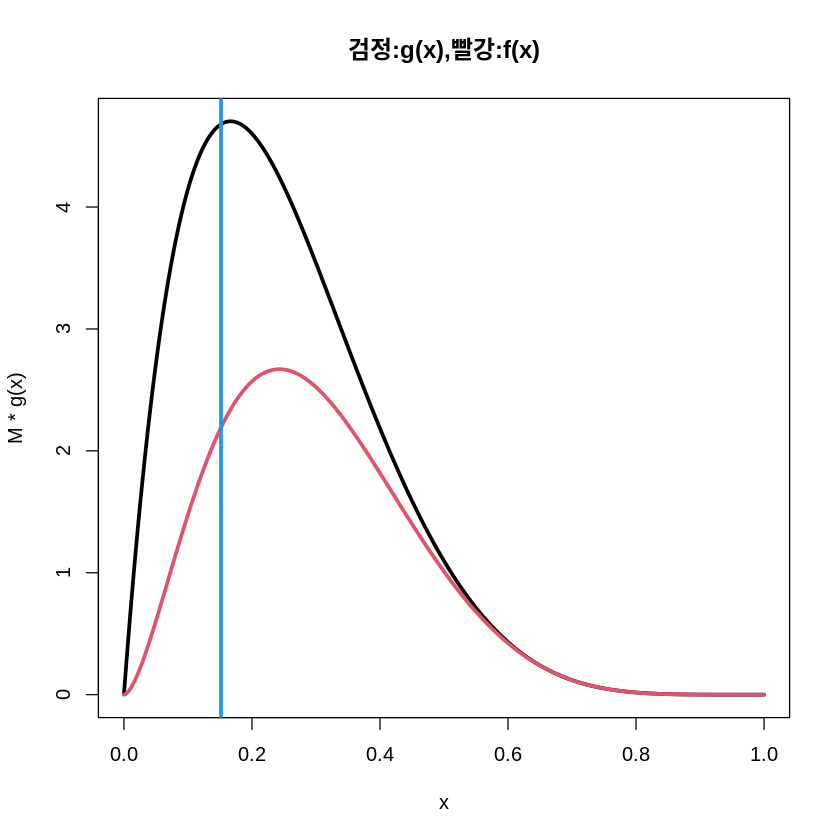

In [37]:
plot(x,M*g(x),type='l',main="검정:g(x),빨강:f(x)",lwd=3)
lines(x,f(x),col=2,lwd=3)
abline(v=Y[1],col=4,lwd=3)

(그럴리는 없겠지만) $x=0.15164974158892$일때 100개의 랜덤변수가 뽑혔다고 하면? 

In [43]:
f(Y[1])/(g(Y[1])*M)

[1] 0.4682273

그중에서 46.82개 정도가 붉은선 아래에 있을것임. 

그렇다면 `Y[1]`의 값을 약 46.82%의 확률로만 `채택`한다면? `채택`된 값은 붉은색의 pdf를 따른다고 주장할 수 있지 않을까? 

(의문) 어떻게 46.82%만 채택하나? 이것도 랜덤변수인데? 

채택을 위해서 $U$를 하나 뽑아보고, $U<0.468227294711988$ 이면 채택하기로 하자. 

In [45]:
set.seed(1)
runif(1)

[1] 0.2655087

$0.2655086631421< 0.468227294711988$이므로 채택하기로 하자. 

### *[알고리즘] 채택/기각 샘플링*

우리가 관심있는 분포의 pdf는 $f$라고 하자. 

적당한 $g$와 $M$이 존재하여 $\max_x\big(\frac{f(x)}{Mg(x)}\big)=1$을 만족한다고 하자.

(1) $g$에서 하나의 랜덤변수 $Y_i$를 추출

(2) 균등분포에서 하나의 랜덤변수 $U_i$를 추출

(3) $U_i<  \frac{f(Y_i)}{Mg(Y_i)}$라면 $X_i=Y_i$, 아니면 (1)로 돌아간다.

제약: $f(x)>0$이면 $g(x)>0$이어야 한다. ($\ast$ $g(x)>0$ 인데 $f(x)=0$인것은 상관없음, 그 경우는 뽑은걸 100%기각하면 된다.)

현실적인 제약: $g$에서 확률변수를 추출할 수 있어야 한다. 

문제: 우리는 $Beta(2,6)$을 못 뽑지 않나?  

***아니다. 할수있다.***

1. 모수가 1인 지수분포 역변환기법으로 뽑을 수 있다. 

2. 모수가 1인 지수분포를 $n_1$개 합치면 그 합친 랜덤변수는 $Gamma(n_1,1)$을 따른다.

3. $\frac{Gamma(n_1,1)}{Gamma(n_1,1)+Gamma(n_2,1)}$는 $Beta(n_1,n_2)$를 따른다. 

In [53]:
n<-10000
## cdf: (1-e^{-x})
## cdf inv: x ==> * -1 ==> exp ==> * -1 ==> +1  //// x-1 ==> -(x-1) ==> log(1-x) ==> -log(1-x)
Exp<- -log(1-runif(n))
# hist(Exp,freq=F)
# hist(rexp(n),freq=F)

In [73]:
n<-10000*2 
Exp<- -log(1-runif(n))
dim(Exp)<-c(2,10000)
Gamma2<-apply(Exp,2,sum)
# hist(Gamma2,freq=F)
# hist(rgamma(10000,2),freq=F)

In [74]:
n<-10000*6
Exp<- -log(1-runif(n))
dim(Exp)<-c(6,10000)
Gamma6<-apply(Exp,2,sum)
# hist(Gamma6,freq=F)
# hist(rgamma(10000,6),freq=F)

In [80]:
Beta26<-Gamma2/(Gamma2+Gamma6)
# hist(Beta26,freq=F)
# hist(rbeta(10000,shape1=2,shape2=6),freq=F)

### *[알고리즘] 채택/기각 샘플링*

우리가 관심있는 분포의 pdf는 $f$라고 하자. 

적당한 $g$와 $M$이 존재하여 $\max_x\big(\frac{f(x)}{Mg(x)}\big)=1$을 만족한다고 하자.

(1) $g$에서 하나의 랜덤변수 $Y_i$를 추출

(2) 균등분포에서 하나의 랜덤변수 $U_i$를 추출

(3) $U_i<  \frac{f(Y_i)}{Mg(Y_i)}$라면 $X_i=Y_i$, 아니면 (1)로 돌아간다.

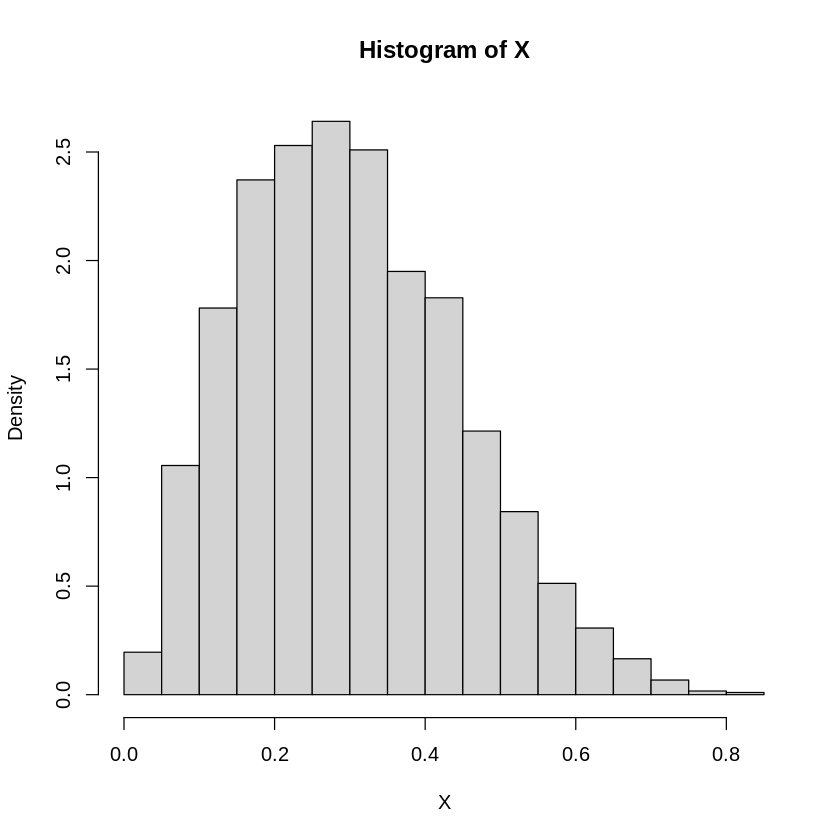

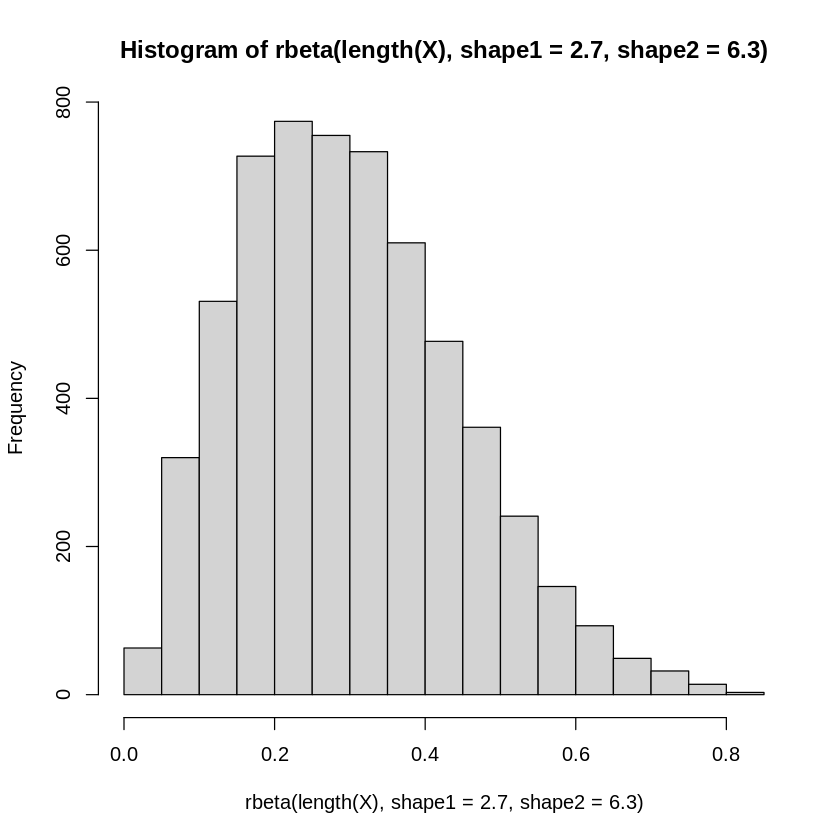

In [88]:
Y<-Beta26
U<-runif(10000)
index_ <- c()
for(i in 1:10000){
    index_[i]<- U[i]<f(Y[i])/(M*g(Y[i]))
}
X<-Y[index_]
hist(X,freq=F)
hist(rbeta(length(X),shape1=2.7,shape2=6.3))

In [90]:
mean(index_)

[1] 0.5929

채택율: 59.29%

### 채택기각 샘플링의 이론적 근거 

결국 모든 $c$에 대하여 $Pr(Y\leq c ~ |~ U < \frac{f(Y)}{Mg(Y)})=Pr(X\leq c)$임을 보이면 된다. 

$LHS=\frac{Pr\big(Y\leq c, ~ U<\frac{f(Y)}{Mg(Y)}\big)}{Pr\big(U<\frac{f(Y)}{Mg(Y)}\big)}=\frac{A}{B}$

$B=Pr\big(U<\frac{f(Y)}{Mg(Y)}\big)=\int_{-\infty}^{\infty}\big(\int_{0}^{\frac{f(y)}{Mg(y)}}du\big) g(y)dy=\int_{-\infty}^{\infty}\big(\frac{f(y)}{Mg(y)}\big) g(y)dy=\frac{1}{M}\int_{-\infty}^{\infty}f(y)dy=\frac{1}{M}$

$A=Pr\big(Y\leq c, U<\frac{f(Y)}{Mg(Y)}\big)=\int_{-\infty}^{c}\big(\int_{0}^{\frac{f(y)}{Mg(y)}}du\big) g(y)dy=\int_{-\infty}^{c}\big(\frac{f(y)}{Mg(y)}\big) g(y)dy=\frac{1}{M}\int_{-\infty}^{c}f(y)dy=\frac{1}{M}Pr(X\leq c)$

따라서 $LHS=\frac{A}{B}=Pr(X\leq c)$